# Titanic

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Initial Exploration and Visualization of the data

In [33]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Check for null values:

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
train.Cabin.isnull().sum() / train.shape[0]

0.7710437710437711

As we can see, the column cabin is almost empty, so we are going to remove it:

In [39]:
train_null = train.copy()
train_null = train_null.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [40]:
train_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


We remove the remaining rows with null values and in the case of the test set, reemplazing them:

In [42]:
train_null.dropna(inplace=True)

In [43]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode())

In [44]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
train_null.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We are now going to drop the id, name and ticket columns cause they are not particularly relevant:

In [46]:
train_col = train_null.copy()
train_col = train_col.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

test = test.drop(['Name', 'Ticket'], axis=1)

In [47]:
train_col.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We are going now to do some visualization of the data:

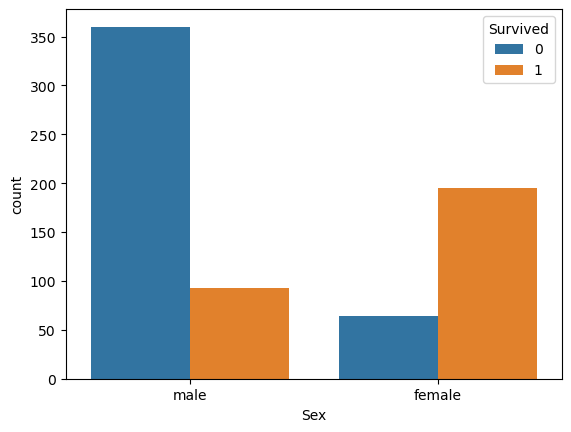

In [48]:
sns.countplot(x=train_col['Sex'], hue=train_col['Survived'])
plt.show()

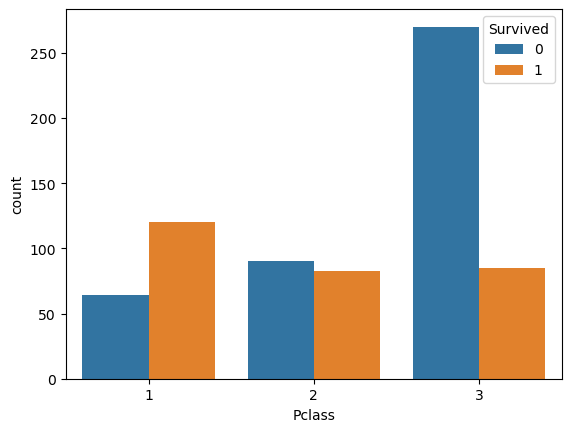

In [49]:
sns.countplot(x=train_col['Pclass'], hue=train_col['Survived'])
plt.show()

/home/silvia/anaconda3/envs/lessons/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


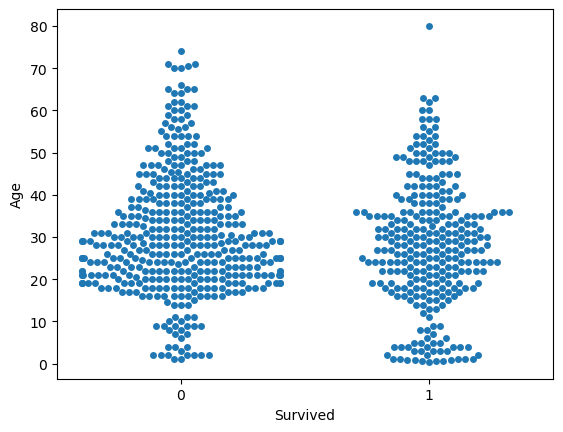

In [50]:
sns.swarmplot(x=train_col['Survived'], y=train_col['Age'])
plt.show()

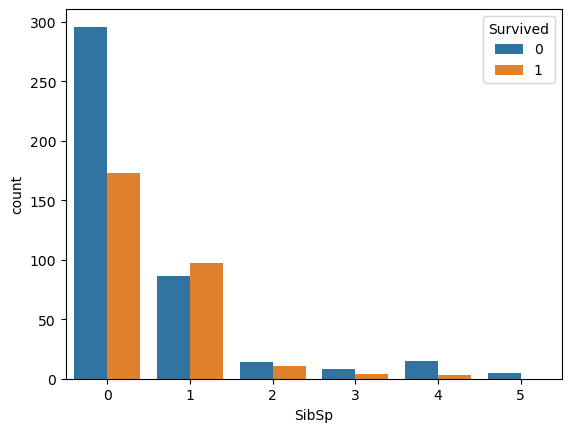

In [51]:
sns.countplot(x=train_col['SibSp'], hue=train_col['Survived'])
plt.show()

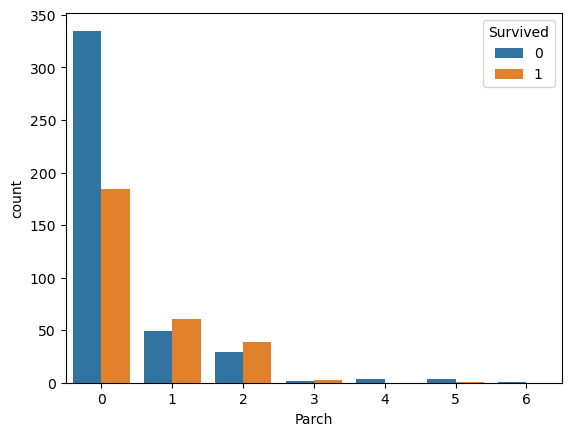

In [52]:
sns.countplot(x=train_col['Parch'], hue=train_col['Survived'])
plt.show()

/home/silvia/anaconda3/envs/lessons/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/silvia/anaconda3/envs/lessons/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/silvia/anaconda3/envs/lessons/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/silvia/anaconda3/envs/lessons/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


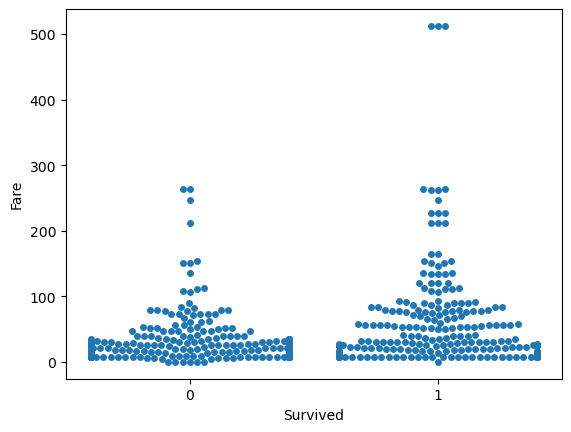

In [53]:
sns.swarmplot(x=train_col['Survived'], y=train_col['Fare'])
plt.show()

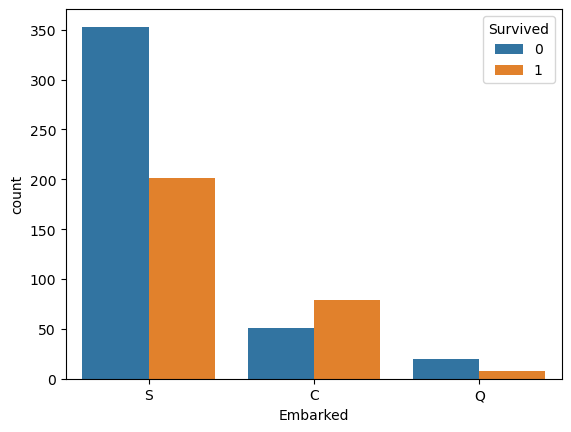

In [54]:
sns.countplot(x=train_col['Embarked'], hue=train_col['Survived'])
plt.show()

We now separate the target from the train set:

In [55]:
y = train_col['Survived'].copy()
X = train_col.drop('Survived', axis=1)

In [56]:
y.value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [57]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


We proceed now to generate dummy variables for the categorical values:

In [58]:
X_dummies = X.copy()
X_dummies = pd.get_dummies(X_dummies, columns=['Pclass', 'Sex', 'Embarked'])
X_test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'])

In [59]:
X_dummies.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


Finally, we normalize the continous variables:

In [60]:
X_train = X_dummies.copy()
y_train = y

scaler_age = MinMaxScaler()
scaler_fare = MinMaxScaler()
scaler_sibsp = MinMaxScaler()
scaler_parch = MinMaxScaler()
X_train['Age'] = scaler_age.fit_transform(X_train[['Age']])
X_train['Fare'] = scaler_fare.fit_transform(X_train[['Fare']])
X_train['SibSp'] = scaler_sibsp.fit_transform(X_train[['SibSp']])
X_train['Parch'] = scaler_parch.fit_transform(X_train[['Parch']])
X_test['Age'] = scaler_age.transform(X_test[['Age']])
X_test['Fare'] = scaler_fare.transform(X_test[['Fare']])
X_test['SibSp'] = scaler_sibsp.transform(X_test[['SibSp']])
X_test['Parch'] = scaler_parch.transform(X_test[['Parch']])

passId = X_test['PassengerId'].copy()
X_test = X_test.drop(['PassengerId'], axis=1)

In [61]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.2,0.0,0.014151,False,False,True,False,True,False,False,True
1,0.472229,0.2,0.0,0.139136,True,False,False,True,False,True,False,False
2,0.321438,0.0,0.0,0.015469,False,False,True,True,False,False,False,True
3,0.434531,0.2,0.0,0.103644,True,False,False,True,False,False,False,True
4,0.434531,0.0,0.0,0.015713,False,False,True,False,True,False,False,True


In [62]:
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.428248,0.0,0.000000,0.015282,False,False,True,False,True,False,True,False
1,0.585323,0.2,0.000000,0.013663,False,False,True,True,False,False,False,True
2,0.773813,0.0,0.000000,0.018909,False,True,False,False,True,False,True,False
3,0.334004,0.0,0.000000,0.016908,False,False,True,False,True,False,False,True
4,0.271174,0.2,0.166667,0.023984,False,False,True,True,False,False,False,True


## Model

In [ ]:
LR = LogisticRegression(random_state=0).fit(X_train, y_train)
DT = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
SVM = SVC(gamma='auto').fit(X_train, y_train)

In [84]:
scores = pd.DataFrame({'LR Score': [LR.score(X_train, y_train)], 
                       'DT Score': [DT.score(X_train, y_train)], 
                       'SVM Score': [SVM.score(X_train, y_train)]})
scores

,LR Score,DT Score,SVM Score
0,0.796348,0.985955,0.779494


In [73]:
predicted_LR = LR.predict(X_test)
predicted_DT = DT.predict(X_test)
predicted_SVM = SVM.predict(X_test)

In [74]:
predicted_LR_data = pd.concat([passId.reset_index(), 
                               pd.Series(predicted_LR)], ignore_index=True, axis=1)
predicted_DT_data = pd.concat([passId.reset_index(), 
                               pd.Series(predicted_DT)], ignore_index=True, axis=1)
predicted_SVM_data = pd.concat([passId.reset_index(), 
                                pd.Series(predicted_SVM)], ignore_index=True, axis=1)

In [75]:
predicted_LR_data.columns.names

FrozenList([None])

In [76]:
predicted_LR_data.columns = ['index', 'PassengerId', 'Survived']
predicted_DT_data.columns = ['index', 'PassengerId', 'Survived']
predicted_SVM_data.columns = ['index', 'PassengerId', 'Survived']

In [77]:
predicted_LR_data = predicted_LR_data.drop('index', axis=1)
predicted_DT_data = predicted_DT_data.drop('index', axis=1)
predicted_SVM_data = predicted_SVM_data.drop('index', axis=1)

In [69]:
predicted_LR_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
predicted_LR_data.to_csv('titanic_LR.csv', index=False)
predicted_DT_data.to_csv('titanic_DT.csv', index=False)
predicted_SVM_data.to_csv('titanic_SVM.csv', index=False)